# Sentiment Analysis for Tweets on #Article13 and #SaveyourInternet

## Import Packages

In [71]:
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [6]:
# read csv
df = pd.read_csv('tweets.csv', index_col = 0)

In [7]:
df.head()

,id,text,polarity_value,subjectivity_value,polarity,subjectivity,name,likes,retweets,date,source
0,1086516600868651008,The EU Copyright Directive could shape the fut...,0.0,0.56,Netural,Subjective,Volker Holloh,1,1,2019-01-19 06:51:58,Twitter Web Client
1,1086516520669327360,@elijax_music @YouTube #Article13 will make we...,-0.1,0.50,Negative,Subjective,Painkiller99 🇨🇦,1,1,2019-01-19 06:51:39,Twitter Web Client
2,1086516272853106688,In 5 hours will begin several protests against...,0.0,0.00,Netural,Objective,Ale Haim #SaveYourInternet,1,1,2019-01-19 06:50:40,Twitter for Android
3,1086514754984783872,"@YouTube is still stealing my royalties, and a...",0.0,0.00,Netural,Objective,Elijax -- Elia Andrea Corazza,3,2,2019-01-19 06:44:38,Twitter for Android
4,1086513360466857984,"The EU parliament wants #Uploadfilter, #Articl...",0.2,0.10,Positive,Objective,G1SH,0,0,2019-01-19 06:39:06,Twitter Web Client


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6307 entries, 0 to 6306
Data columns (total 11 columns):
id                    6307 non-null int64
text                  6307 non-null object
polarity_value        6307 non-null float64
subjectivity_value    6307 non-null float64
polarity              6307 non-null object
subjectivity          6307 non-null object
name                  6307 non-null object
likes                 6307 non-null int64
retweets              6307 non-null int64
date                  6307 non-null object
source                6307 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 591.3+ KB


In [20]:
# check for null values
df.isna().sum()

id                    0
text                  0
polarity_value        0
subjectivity_value    0
polarity              0
subjectivity          0
name                  0
likes                 0
retweets              0
date                  0
source                0
dtype: int64

In [22]:
# duplicates
df.duplicated().sum()

1798

## Data Wrangling

In [25]:
# Drop Duplicate Rows
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

0

## Analysis

Polarity can take on a range from -1 to 1, where -1 is the most negative and 1 is the most positive. Subjectivity ranges from 0 to 1, where 1 is high subjectivity and 0 is low subjectivity (in other words high objectivity).

In [76]:
# polarity value Distribution

trace = go.Histogram(x = df.polarity_value)
data = [trace]
layout = go.Layout(title= 'Distribution of Polarity Value')
fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig)

Most of the polarity values are 0

In [77]:
# subjectivity value frequency

trace = go.Histogram(x = df.subjectivity_value)
data = [trace]
layout = go.Layout(title= 'Distribution of Subjectivity Value')
fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig)

In [88]:
# Distribution of Polartiy 

polarity = pd.DataFrame({'polarity':df.polarity.value_counts()})
polarity = polarity.sort_values(by = 'polarity', ascending = False)

trace = go.Bar( x = polarity.index ,
              y = polarity.polarity)

data = [trace]

layout = go.Layout( title = 'Distribution of Polarity',
                  xaxis = dict(title = 'Polarity'),
                  yaxis = dict(title = 'Count'))
fig = go.Figure(data = data, layout=layout)
plotly.offline.iplot(fig)

Most of the tweets are Netural while, some beign positive and negative. 

In [93]:
# Distribution of Subjectivity 

subjectivity = pd.DataFrame({'subjectivity':df.subjectivity.value_counts()})
subjectivity = subjectivity.sort_values(by = 'subjectivity', ascending = False)

trace = go.Bar( x = subjectivity.index ,
              y = subjectivity.subjectivity)

data = [trace]

layout = go.Layout( title = 'Distribution of Subjectivity',
                  xaxis = dict(title = 'Subjectivity'),
                  yaxis = dict(title = 'Count'))
fig = go.Figure(data = data, layout=layout)
plotly.offline.iplot(fig)

More than half of the tweets are Objective. 

In [112]:
#top 10 of source of tweets

source = pd.DataFrame({'source' : df.source.value_counts()})
source = source.sort_values(by = 'source', ascending = False)
source = source.head(10)

trace = go.Bar( x = source.index,
              y = source.source)

data = [trace]

layout = go.Layout(title = 'Top 10 Source of Tweets', 
                  xaxis = dict(title = 'Source'),
                  yaxis = dict(title = 'Count'))

fig = go.Figure(data = data, layout=layout)
plotly.offline.iplot(fig)

Twitter web Client is the most popular source for tweets while Android takes the second place and ios third.

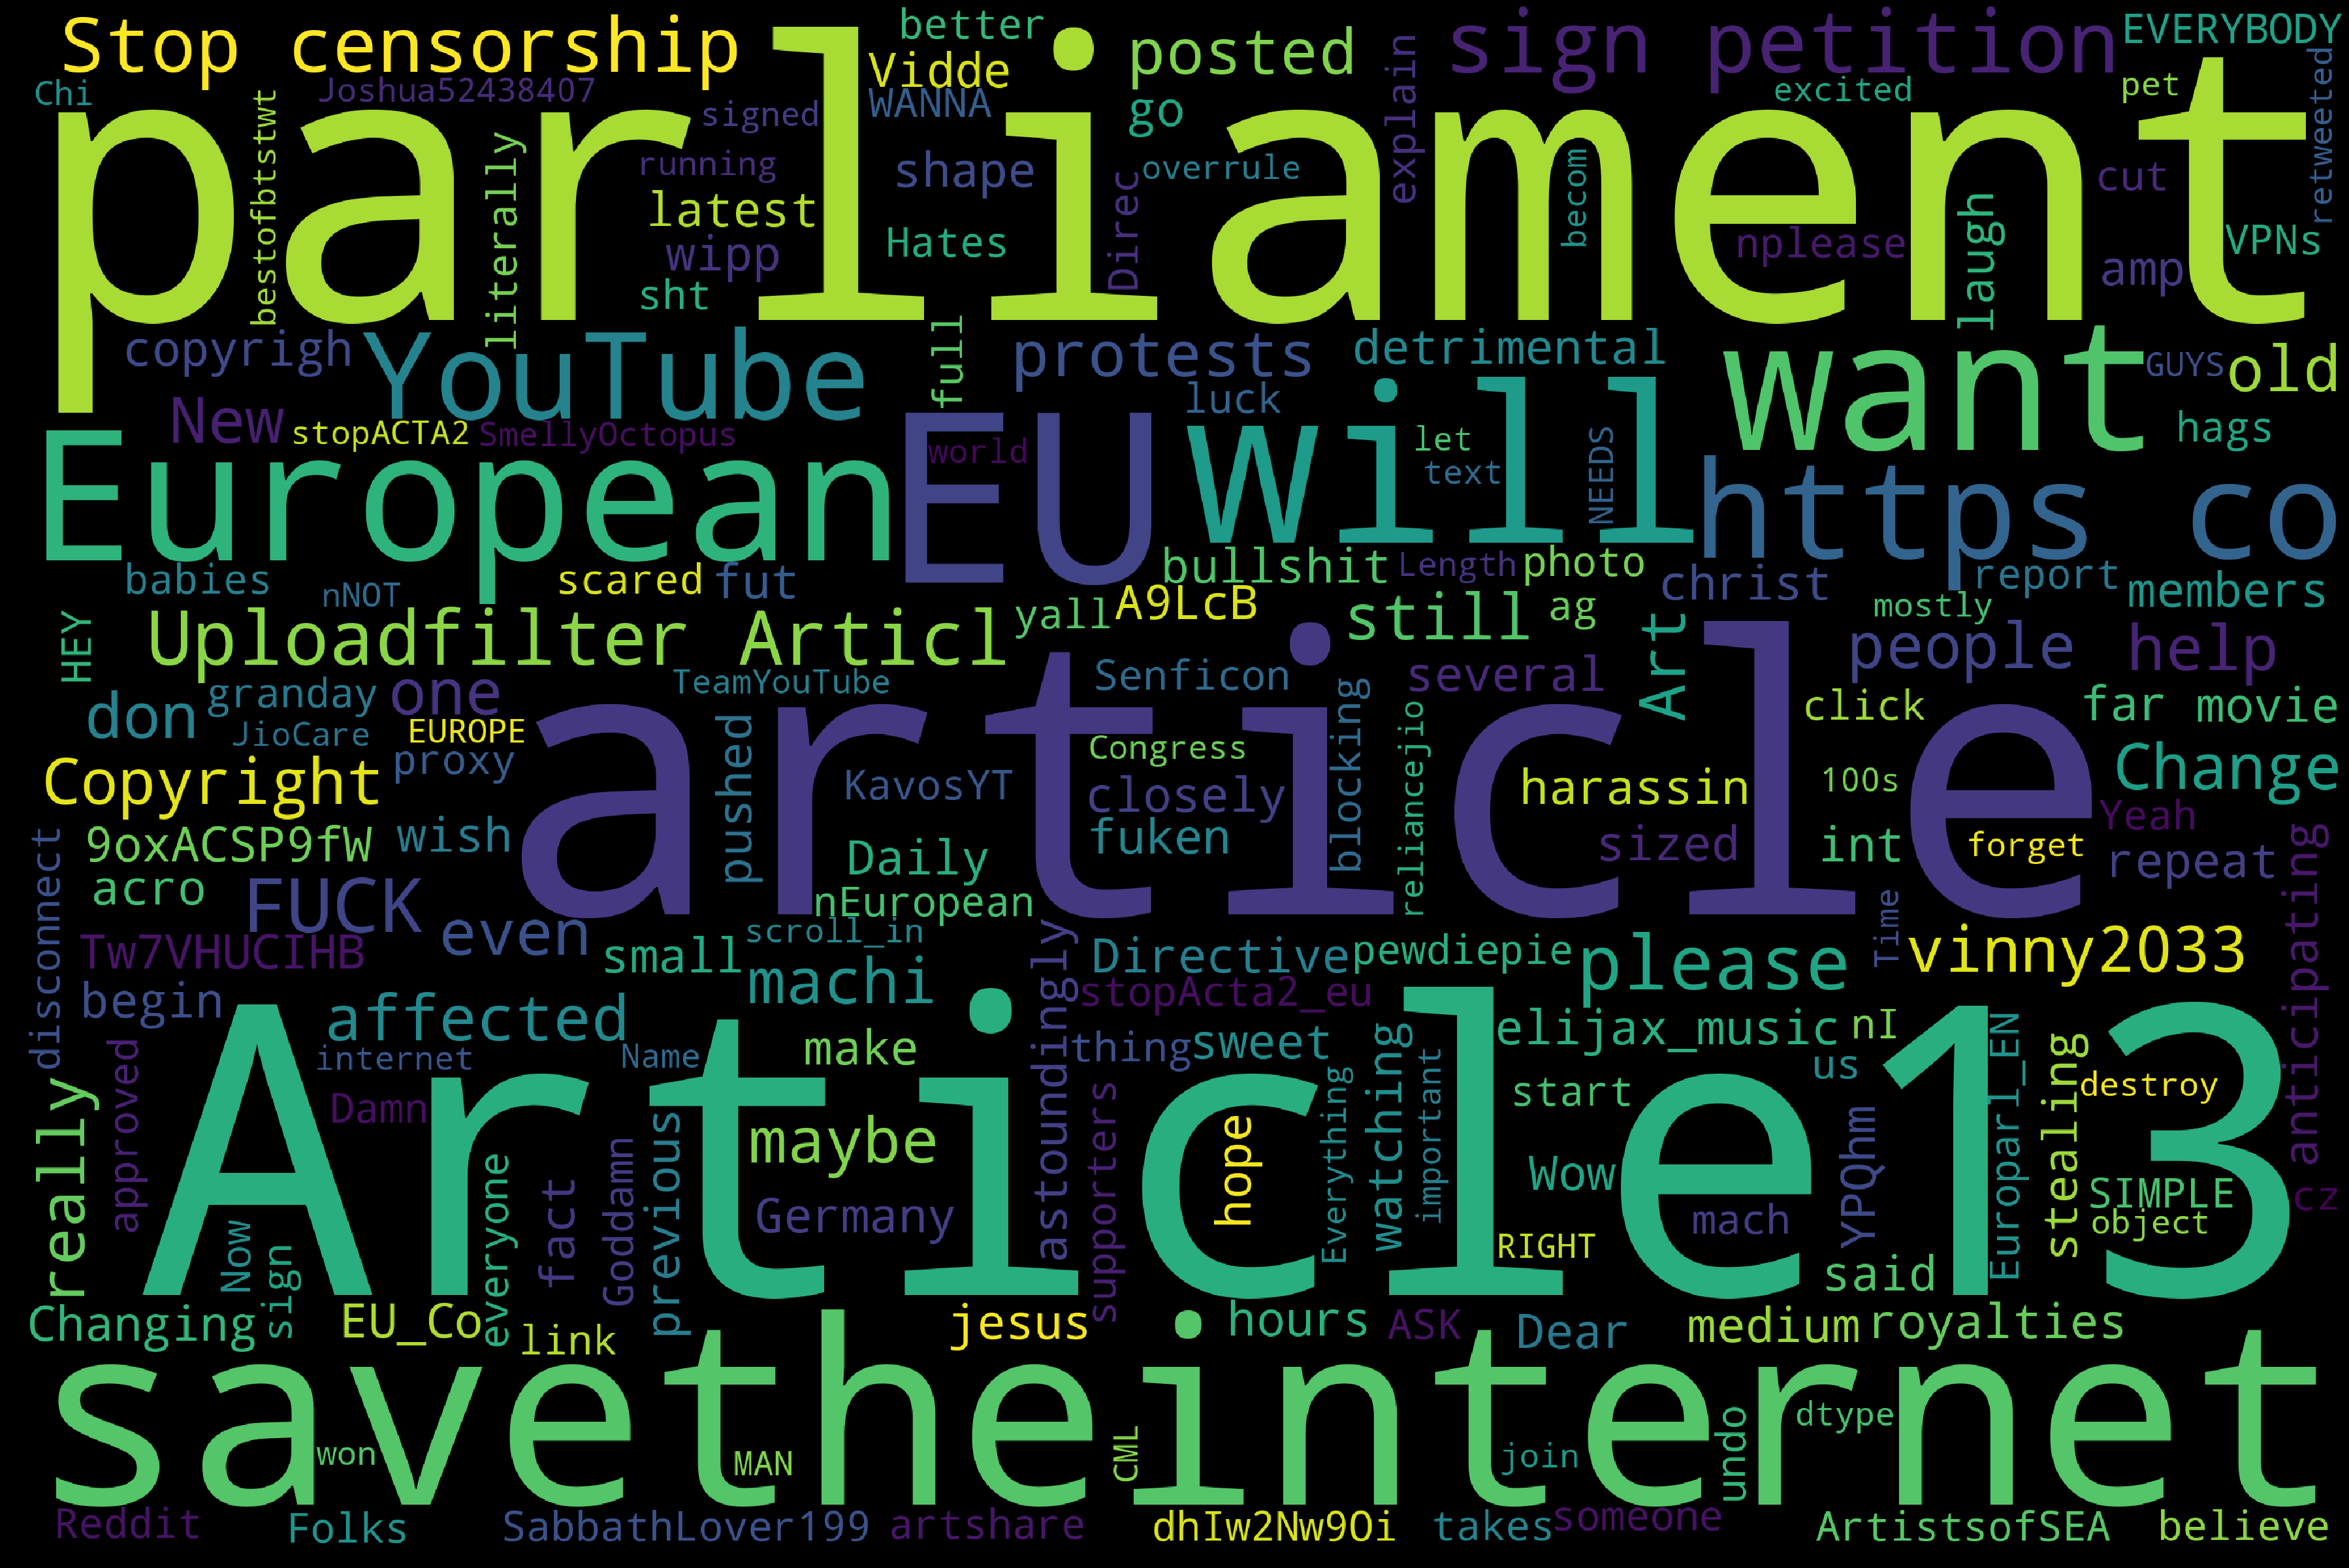

In [125]:
#wordcloud of tweets
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = df.text 

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (50, 40),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0.2)
plt.show()

## Conclusion

The result from this analysis is not accurate because, I don't have all the tweets for this topic and to get more accurate results we need to customize and retarin TextBlob inorder to get a much viable result.